In [11]:
import random
import string
import numpy as np
import pandas as pd
import os
import sys
import subprocess
import matplotlib.pyplot as plt
import re

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.despine()
sns.set(rc={'figure.figsize':(6,4)})
# sns.set(rc={'figure.figsize':(14,8)})
plt.style.use('seaborn-whitegrid')

import RNA
from helper import print_moves

<Figure size 432x288 with 0 Axes>

# MFE FP example

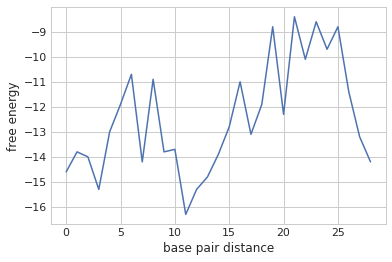

In [12]:
energies = [-14.60,  -13.80, -14.00, -15.30,  -13.00,  -11.90, -10.70,  -14.20,  -10.90, -13.80, -13.70, 

-16.30,

-15.30, -14.80, -13.90, -12.80,  -11.00, -13.10,  -11.90,   -8.80, -12.30,  -8.40,  -10.10,  -8.60, -9.70,  -8.80, -11.40,  -13.20,  -14.20]

bp_distances = np.arange(0, len(energies), 1)


d = {'free energy': energies, 'base pair distance': bp_distances}
df = pd.DataFrame(d)

p = sns.lineplot(x='base pair distance', y='free energy', data=df)
fig = p.get_figure()
fig.savefig('mfe_example.svg', dpi=500)


<AxesSubplot:xlabel='sequence_length', ylabel='runtime'>

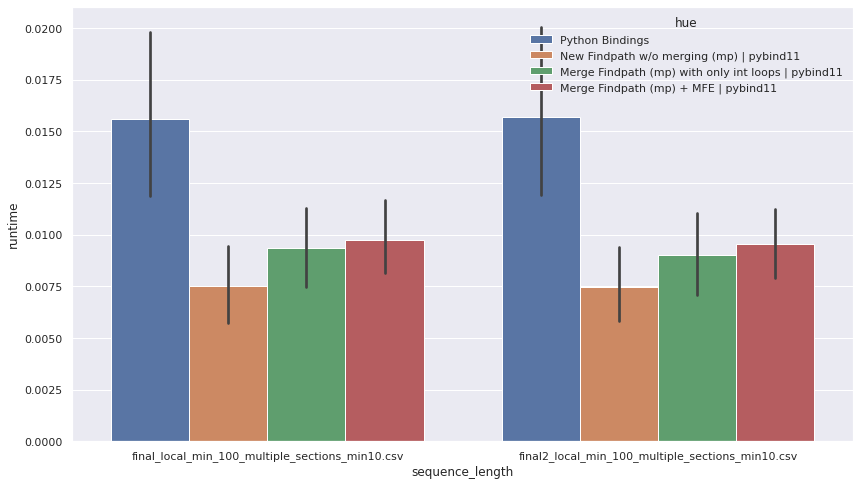

In [38]:
# hashing effect

sns.set(rc={'figure.figsize':(14,8)})

# barrier shift
prefix = "./results/"
filenames = [
             "n_local_min_100_multiple_sections_min10.csv",
             "n_local_min_200_multiple_sections_min10.csv",
             "n_local_min_300_multiple_sections_min10.csv",
             "n_local_min_400_multiple_sections_min10.csv",
            #  "n_local_min_600_multiple_sections_min10.csv",
             ]

filenames = [
             "final_local_min_100_multiple_sections_min10.csv",
             "final_local_min_200_multiple_sections_min10.csv",
             "final_local_min_300_multiple_sections_min10.csv",
             "final_local_min_400_multiple_sections_min10.csv",
            #  "final_local_min_600_multiple_sections_min10.csv",
             ]

filenames = [
             "final_local_min_100_multiple_sections_min10.csv",
             "final2_local_min_100_multiple_sections_min10.csv",
             ]

filenames = [
             "final_local_min_200_multiple_sections_min10.csv",
             "final2_local_min_200_multiple_sections_min10.csv",
             ]

subplots = len(filenames)

df = pd.DataFrame()

for i, filename in enumerate(filenames):
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["sequence_length"] = filename
    c_df["runtime"] = c_df["py_runtimes"]
    c_df["hue"] = "Python Bindings"    
    df = pd.concat(frames)    

    # c_df = pd.read_csv(prefix+filename)
    # frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    # c_df["runtime"] = c_df["new_fp_runtimes"]
    # c_df["hue"] = "New Findpath w/o merging (single thread) | pybind11" 
    # df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["sequence_length"] = filename
    c_df["runtime"] = c_df["new_fp_runtimes"]
    c_df["hue"] = "New Findpath w/o merging (mp) | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["sequence_length"] = filename
    c_df["runtime"] = c_df["new_merge_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) with only int loops | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["sequence_length"] = filename
    c_df["runtime"] = c_df["new_merge_mfe_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) + MFE | pybind11" 
    df = pd.concat(frames)    
    
    # c_df = pd.read_csv(prefix+filename)
    # frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    # c_df["runtime"] = c_df["new_merge_ext_runtimes"]
    # c_df["hue"] = "Merge Findpath (mp) with ext loops | pybind11"    
    # df = pd.concat(frames)   
    

sns.barplot(y="runtime", x="sequence_length", hue="hue", data=df)

sum deviations: -2.200000000000001


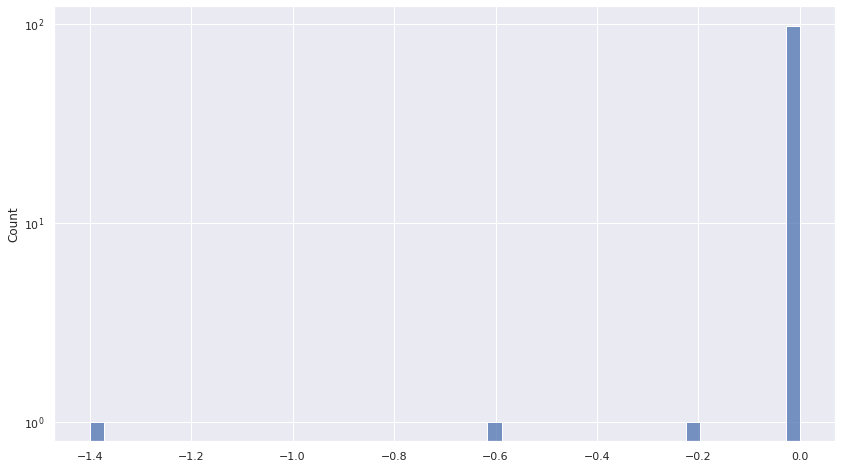

In [39]:
# dataset with 10,000 sequences

prefix = "./results/"
filename = "final_local_min_100_multiple_sections_min10.csv"
# filename = "final_local_min_400_multiple_sections_min10.csv"


a_df = pd.read_csv(prefix+filename)
differences = a_df["new_merge_mfe_results"] - a_df["new_fp_results"]
differences = a_df["new_merge_results"] - a_df["new_fp_results"]

sns.histplot(differences, bins=50)        
plt.yscale('log',base=10) 
print ("sum deviations:", sum(differences))